<a href="https://colab.research.google.com/github/AbhijnaKalbhag/Mapping-Recommendations-to-A-star/blob/main/minor2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 17.8 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
import datasets
datasets.logging.set_verbosity_error()

In [ ]:
from datasets import load_dataset
dataset_All_Beauty = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_meta_Cell_Phones_and_Accessories", split="full", trust_remote_code=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating full split: 0 examples [00:00, ? examples/s]

In [ ]:
import nltk
nltk.download('wordnet')
import networkx as nx
from datasets import load_dataset
from nltk.corpus import wordnet as wn
from difflib import SequenceMatcher
import matplotlib.pyplot as plt

# Step function for numeric attributes
def numeric_similarity(attr1, attr2, threshold=0.5):
    if abs(attr1 - attr2) < threshold:
        return 1
    else:
        return 0

# Wu-Palmer similarity for textual attributes
def wu_palmer_similarity(word1, word2):
    synsets1 = wn.synsets(word1)
    synsets2 = wn.synsets(word2)
    if synsets1 and synsets2:
        similarity = max((wn.wup_similarity(s1, s2) or 0) for s1 in synsets1 for s2 in synsets2)
    else:
        similarity = 0
    return similarity

# Combine similarity measures into a single number
def combine_similarity(numeric_sim, textual_sim):
    return (numeric_sim + textual_sim) / 2

# Load the "Cell_Phones_and_Accessories" dataset
dataset_Cell_Phones_and_Accessories = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_meta_Cell_Phones_and_Accessories", split="full", trust_remote_code=True)

# Print dataset attributes in JSON format for the top 15 items
for idx, item in enumerate(dataset_Cell_Phones_and_Accessories):
    if idx >= 15:
        break
    print("{")
    for attr_name, attr_value in item.items():
        print(f'  "{attr_name}": "{attr_value}",')
    print("}")




# Iterate over pairs of JSON items in the dataset
for i, item1 in enumerate(dataset_Cell_Phones_and_Accessories):
    if i >= 45:  # Stop after processing 45 nodes
        break
    for j, item2 in enumerate(dataset_Cell_Phones_and_Accessories):
        if j >= 30:  # Stop after processing 30 nodes
            break
        if i != j:  # Skip comparing an item to itself
            # Initialize similarity measures
            numeric_sim = 0
            textual_sim = 0

            # Iterate over attributes in the first item
            for attr_name, attr_value in item1.items():
                # Check if the attribute is numeric
                if isinstance(attr_value, (int, float)):
                    # If the corresponding attribute in the second item is also numeric, compute similarity
                    if isinstance(item2.get(attr_name), (int, float)):
                        numeric_sim += numeric_similarity(attr_value, item2[attr_name])
                else:
                    # If the corresponding attribute in the second item is also textual, compute similarity
                    if isinstance(item2.get(attr_name), str):
                        textual_sim += wu_palmer_similarity(attr_value, item2[attr_name])

            # Combine similarity measures
            combined_sim = combine_similarity(numeric_sim, textual_sim)

            # Normalize similarity between 0 and 1
            normalized_sim = min(max(combined_sim, 0), 1)

            # Print similarity value
            print(f"Similarity between item {i} and {j}: {normalized_sim}")






[nltk_data] Downloading package wordnet to /root/nltk_data...
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating full split: 0 examples [00:00, ? examples/s]

{
  "main_category": "Cell Phones & Accessories",
  "title": "ARAREE Slim Diary Cell Phone Case for Samsung Galaxy Note 5 - Retail Packaging - Coral Pink",
  "average_rating": "3.8",
  "rating_number": "5",
  "features": "['Genuine Cow leather with 6 different colors', '3 Pockets for ID, Cards and receipts', 'The inside skin is made of microsuede, polycarbonate', "It doesn't have magnets The inner PC case color is gold", 'Made in Korea']",
  "description": "["JUST LOOK, You can tell the difference. Make everyday more convenient, it is slim but has big rooms. If you are looking for a rich and luxurious appearance, look no further. These double shoulders are the perfect leather for creating attractive finished belts, straps and wallets. It doesn't only show the perfect weight for accessories where rugged durability is needed but also has a natural finish and coarse grain."]",
  "price": "None",
  "images": "{'hi_res': [None, None, None, None, None, None, None], 'large': ['https://m.media

In [ ]:
# Create an empty graph
graph = nx.Graph()

# Iterate over pairs of JSON items in the dataset
for i, item1 in enumerate(dataset_Cell_Phones_and_Accessories):
    if i >= 45:  # Stop after processing 45 nodes
        break
    for j, item2 in enumerate(dataset_Cell_Phones_and_Accessories):
        if j >= 30:  # Stop after processing 30 nodes
            break
        if i != j:  # Skip comparing an item to itself
            # Initialize similarity measures
            numeric_sim = 0
            textual_sim = 0

            # Iterate over attributes in the first item
            for attr_name, attr_value in item1.items():
                # Check if the attribute is numeric
                if isinstance(attr_value, (int, float)):
                    # If the corresponding attribute in the second item is also numeric, compute similarity
                    if isinstance(item2.get(attr_name), (int, float)):
                        numeric_sim += numeric_similarity(attr_value, item2[attr_name])
                else:
                    # If the corresponding attribute in the second item is also textual, compute similarity
                    if isinstance(item2.get(attr_name), str):
                        textual_sim += wu_palmer_similarity(attr_value, item2[attr_name])

            # Combine similarity measures
            combined_sim = combine_similarity(numeric_sim, textual_sim)

            # Normalize similarity between 0 and 1
            normalized_sim = min(max(combined_sim, 0), 1)

            # Print similarity value
            print(f"Similarity between item {i} and {j}: {normalized_sim}")


NameError: name 'nx' is not defined

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating full split: 0 examples [00:00, ? examples/s]

KeyError: 45

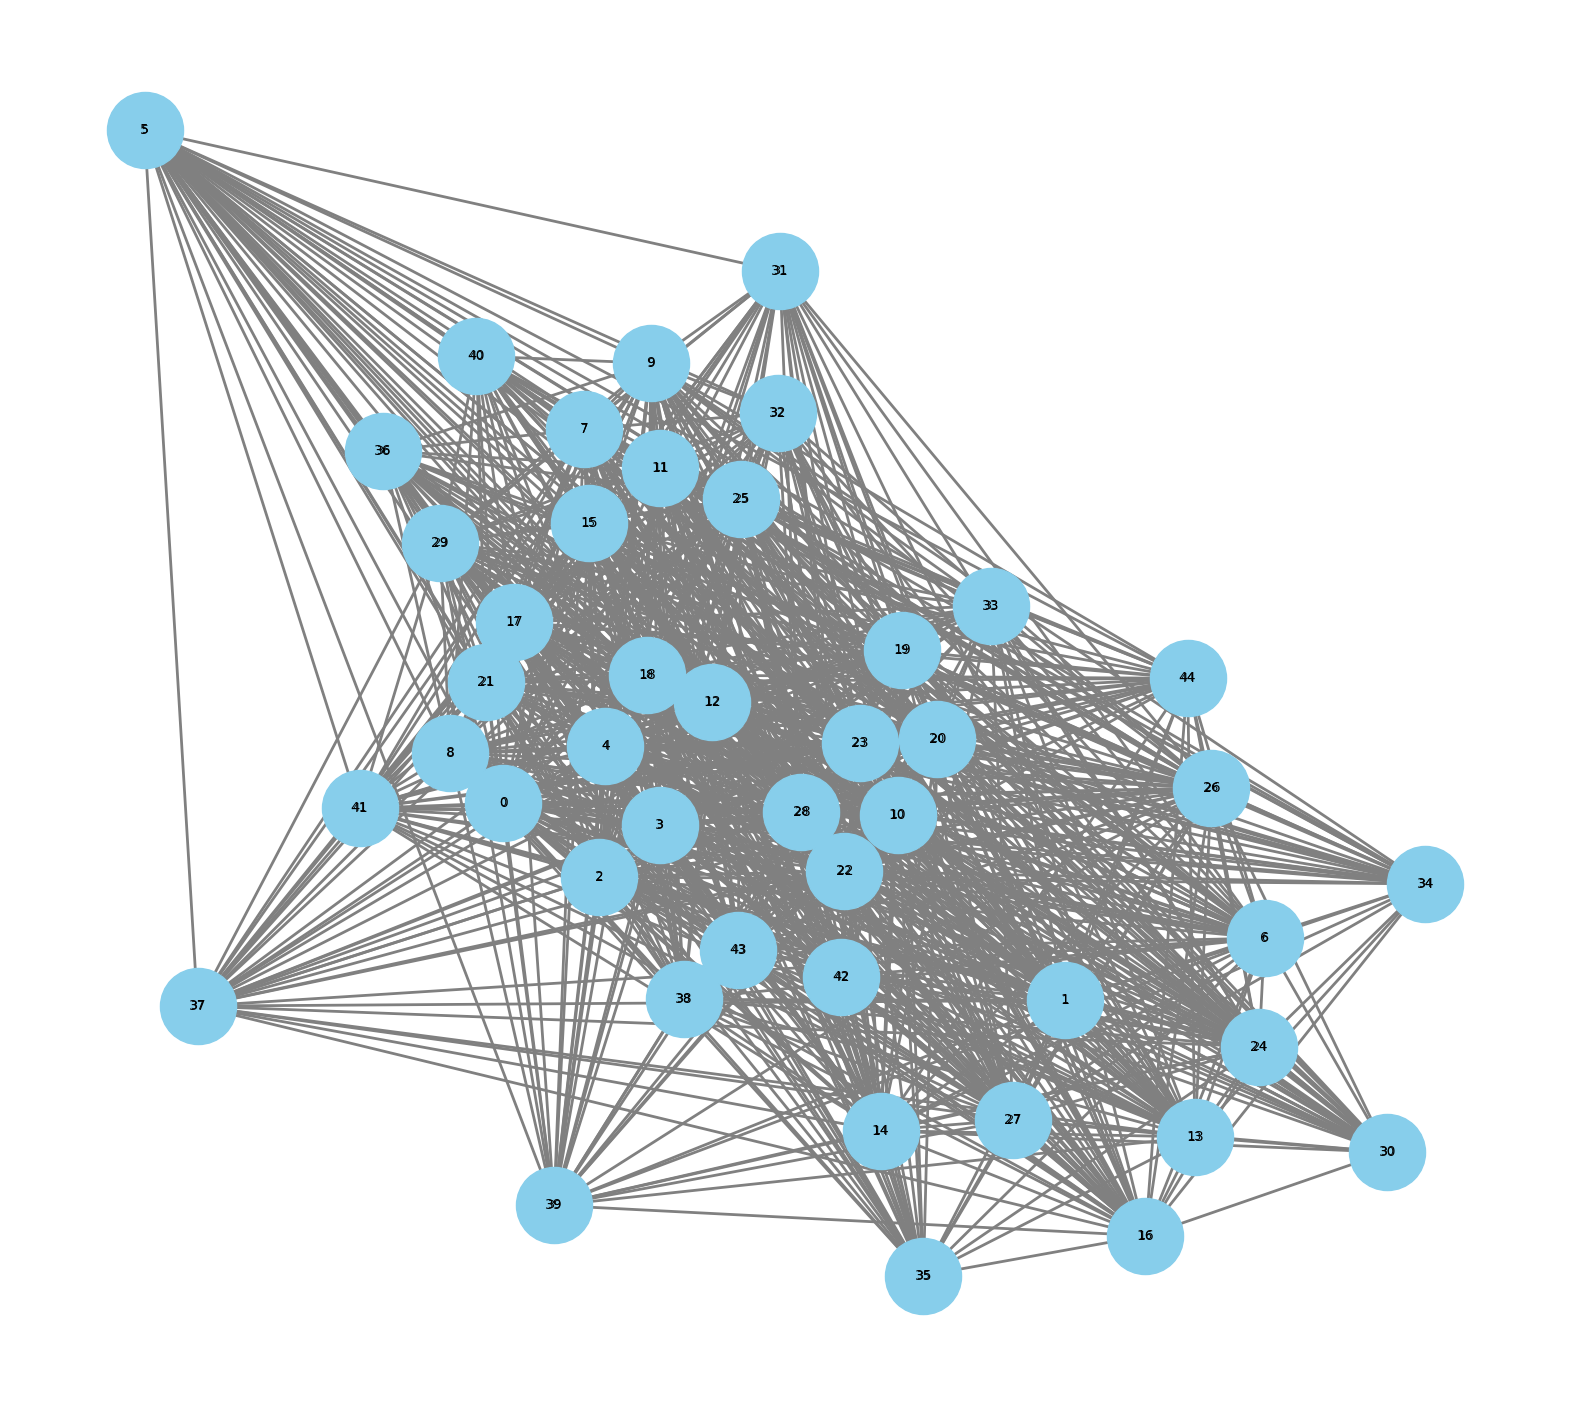

In [ ]:

import nltk
nltk.download('wordnet')
import networkx as nx
from datasets import load_dataset
from nltk.corpus import wordnet as wn
from difflib import SequenceMatcher
import matplotlib.pyplot as plt

# Step function for numeric attributes
def numeric_similarity(attr1, attr2, threshold=0.5):
    if abs(attr1 - attr2) < threshold:
        return 1
    else:
        return 0

# Wu-Palmer similarity for textual attributes
def wu_palmer_similarity(word1, word2):
    synsets1 = wn.synsets(word1)
    synsets2 = wn.synsets(word2)
    if synsets1 and synsets2:
        similarity = max((wn.wup_similarity(s1, s2) or 0) for s1 in synsets1 for s2 in synsets2)
    else:
        similarity = 0
    return similarity

# Combine similarity measures into a single number
def combine_similarity(numeric_sim, textual_sim):
    return (numeric_sim + textual_sim) / 2

# Load the "Cell_Phones_and_Accessories" dataset
dataset_Cell_Phones_and_Accessories = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_meta_Cell_Phones_and_Accessories", split="full", trust_remote_code=True)

# Create an empty graph
graph = nx.Graph()

# Iterate over pairs of JSON items in the dataset
for i, item1 in enumerate(dataset_Cell_Phones_and_Accessories):
    if i >= 45:  # Stop after processing 45 nodes
        break
    for j, item2 in enumerate(dataset_Cell_Phones_and_Accessories):
        if j >= 30:  # Stop after processing 30 nodes
            break
        if i != j:  # Skip comparing an item to itself
            # Initialize similarity measures
            numeric_sim = 0
            textual_sim = 0

            # Iterate over attributes in the first item
            for attr_name, attr_value in item1.items():
                # Check if the attribute is numeric
                if isinstance(attr_value, (int, float)):
                    # If the corresponding attribute in the second item is also numeric, compute similarity
                    if isinstance(item2.get(attr_name), (int, float)):
                        numeric_sim += numeric_similarity(attr_value, item2[attr_name])
                else:
                    # If the corresponding attribute in the second item is also textual, compute similarity
                    if isinstance(item2.get(attr_name), str):
                        textual_sim += wu_palmer_similarity(attr_value, item2[attr_name])

            # Combine similarity measures
            combined_sim = combine_similarity(numeric_sim, textual_sim)

            # Normalize similarity between 0 and 1
            normalized_sim = min(max(combined_sim, 0), 1)
            graph.add_edge(i, j, weight=normalized_sim)

# Draw the graph with expanded size
fig, ax = plt.subplots(figsize=(20, 18))
pos = nx.spring_layout(graph, seed=42)
nx.draw(graph, pos, with_labels=True, node_size=3000, font_size=10, node_color='skyblue', edge_color='gray', width=2)

# Rename nodes with numbers
node_labels = {i: str(i) for i in range(len(dataset_Cell_Phones_and_Accessories))}
nx.draw_networkx_labels(graph, pos, labels=node_labels, font_color='black', font_size=8)

# Show the graph
plt.show()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


KeyError: 1

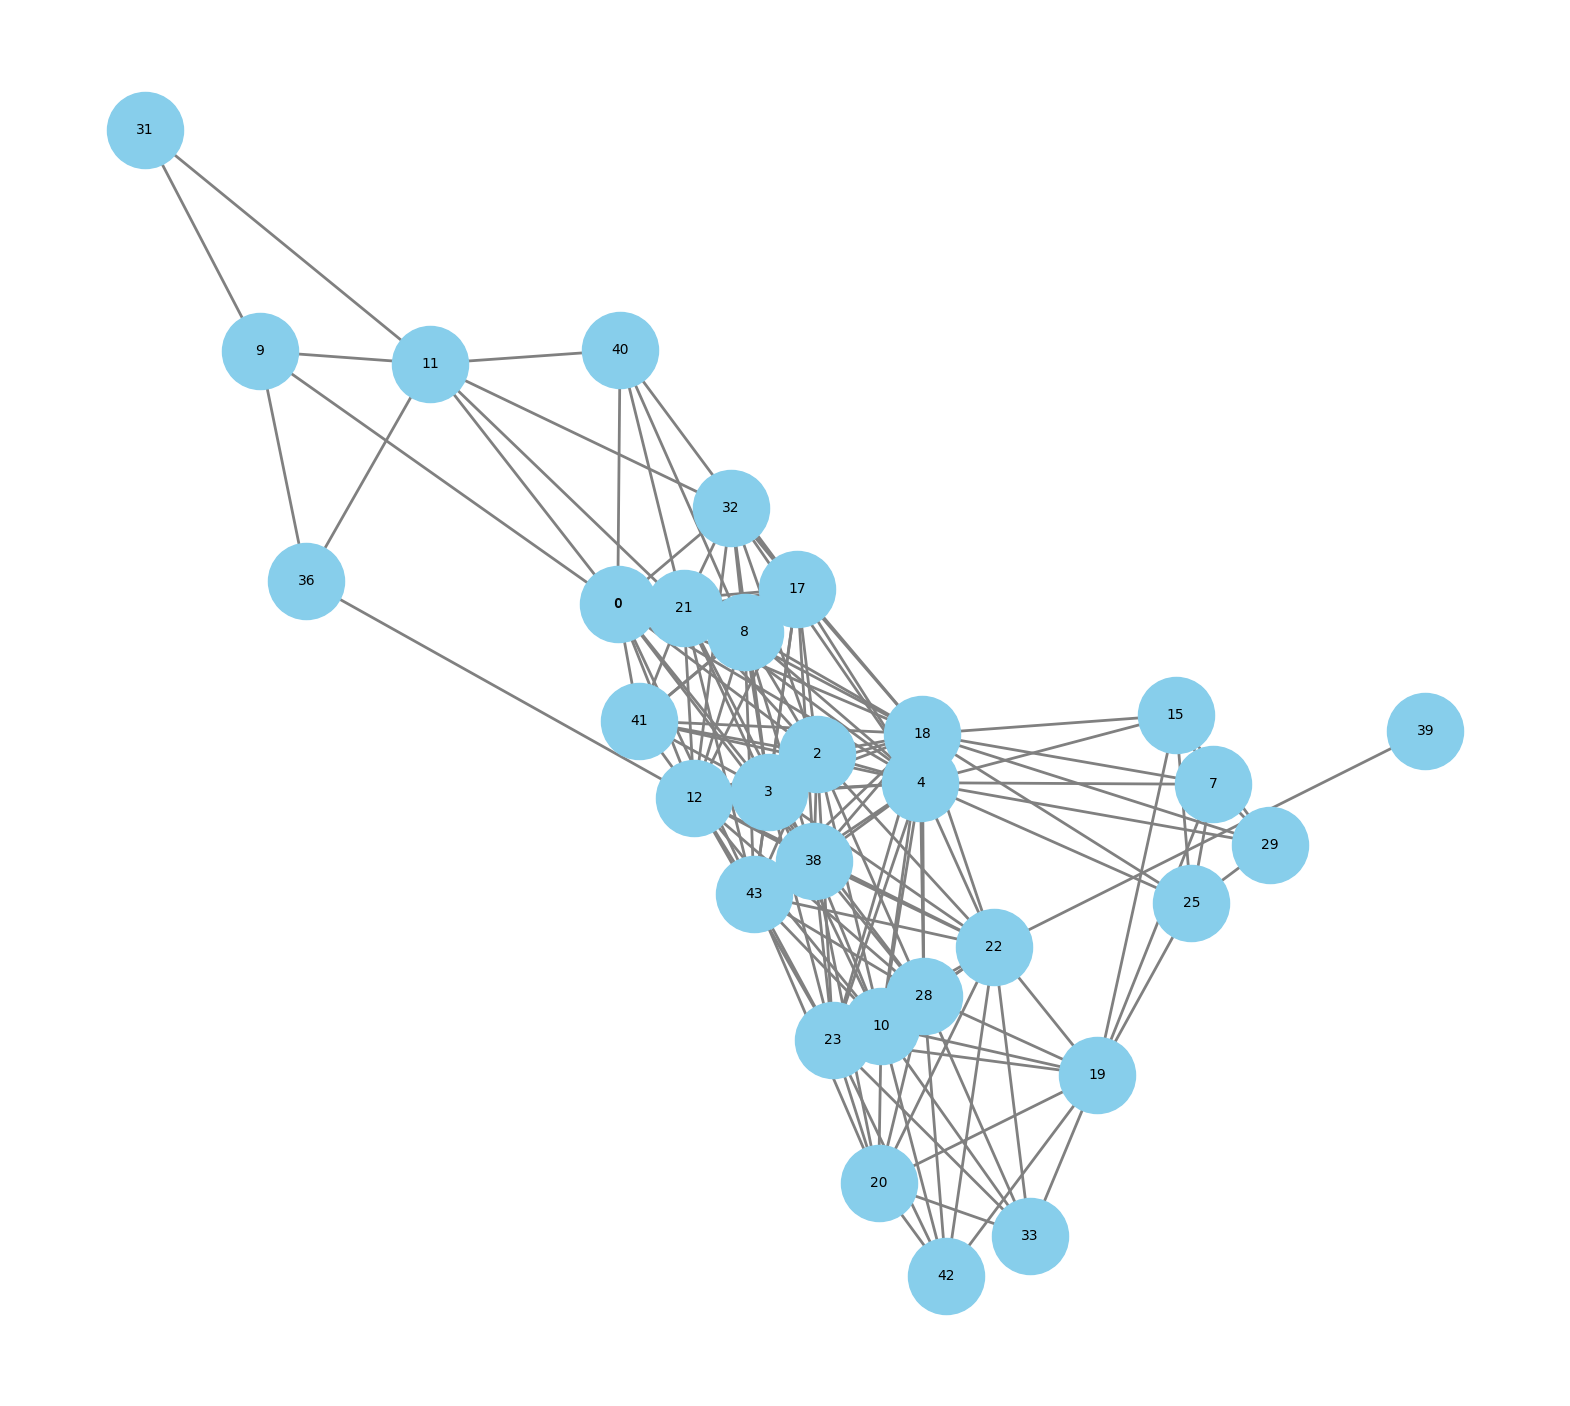

In [ ]:

import nltk
nltk.download('wordnet')
import networkx as nx
from datasets import load_dataset
from nltk.corpus import wordnet as wn
from difflib import SequenceMatcher
import matplotlib.pyplot as plt

# Step function for numeric attributes
def numeric_similarity(attr1, attr2, threshold=0.5):
    if abs(attr1 - attr2) < threshold:
        return 1
    else:
        return 0

# Wu-Palmer similarity for textual attributes
def wu_palmer_similarity(word1, word2):
    synsets1 = wn.synsets(word1)
    synsets2 = wn.synsets(word2)
    if synsets1 and synsets2:
        similarity = max((wn.wup_similarity(s1, s2) or 0) for s1 in synsets1 for s2 in synsets2)
    else:
        similarity = 0
    return similarity

# Combine similarity measures into a single number
def combine_similarity(numeric_sim, textual_sim):
    return (numeric_sim + textual_sim) / 2

# Load the "Cell_Phones_and_Accessories" dataset
dataset_Cell_Phones_and_Accessories = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_meta_Cell_Phones_and_Accessories", split="full", trust_remote_code=True)

# Create an empty graph
graph = nx.Graph()

# Iterate over pairs of JSON items in the dataset
for i, item1 in enumerate(dataset_Cell_Phones_and_Accessories):
    if i >= 45:  # Stop after processing 45 nodes
        break
    for j, item2 in enumerate(dataset_Cell_Phones_and_Accessories):
        if j >= 30:  # Stop after processing 30 nodes
            break
        if i != j:  # Skip comparing an item to itself
            # Initialize similarity measures
            numeric_sim = 0
            textual_sim = 0

            # Iterate over attributes in the first item
            for attr_name, attr_value in item1.items():
                # Check if the attribute is numeric
                if isinstance(attr_value, (int, float)):
                    # If the corresponding attribute in the second item is also numeric, compute similarity
                    if isinstance(item2.get(attr_name), (int, float)):
                        numeric_sim += numeric_similarity(attr_value, item2[attr_name])
                else:
                    # If the corresponding attribute in the second item is also textual, compute similarity
                    if isinstance(item2.get(attr_name), str):
                        textual_sim += wu_palmer_similarity(attr_value, item2[attr_name])

            # Combine similarity measures
            combined_sim = combine_similarity(numeric_sim, textual_sim)

            # Normalize similarity between 0 and 1
            normalized_sim = min(max(combined_sim, 0), 1)

            # Add edge to the graph and name the edge based on the 'title' attribute
            if normalized_sim > 0.8:
                graph.add_edge(i, j, weight=normalized_sim)

# Draw the graph with expanded size
fig, ax = plt.subplots(figsize=(20, 18))
pos = nx.spring_layout(graph, seed=42)
nx.draw(graph, pos, with_labels=True, node_size=3000, font_size=10, node_color='skyblue', edge_color='gray', width=2)

# Rename nodes with numbers
node_labels = {i: str(i) for i in range(len(dataset_Cell_Phones_and_Accessories))}
nx.draw_networkx_labels(graph, pos, labels=node_labels, font_color='black', font_size=8)

# Show the graph
plt.show()

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from datasets import load_dataset

# Download NLTK resources (if not already downloaded)
nltk.download('vader_lexicon')

# Load the "Cell_Phones_and_Accessories" dataset
Dataset_review_Cell_Phones_and_Accessories = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_Cell_Phones_and_Accessories", split="full", trust_remote_code=True)

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to perform sentiment analysis using NLTK's SentimentIntensityAnalyzer
def perform_sentiment_analysis(text):
    # Calculate sentiment scores
    sentiment_scores = sia.polarity_scores(text)

    # Normalize the compound score to range from 0 to 1
    normalized_score = (sentiment_scores['compound'] + 1) / 2

    # Return the normalized score
    return normalized_score

# Iterate over the first 45 items in the dataset
for i in range(45):
    item = Dataset_review_Cell_Phones_and_Accessories[i]
    if 'text' in item:
        review_text = item['text']
        sentiment_score = perform_sentiment_analysis(review_text)
        print(f"Item {i} Text: {review_text}")
        print(f"Item {i} Normalized Sentiment Score: {sentiment_score}\n")
    else:
        print(f"Item {i} does not contain the 'text' attribute.")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Generating full split: 0 examples [00:00, ? examples/s]

Item 0 Text: I bought this bc I thought it had the nice white background. Turns out it’s clear & since my phone is blue it doesn’t look anything like this.  If I had known that I would have purchased something else. It works ok.
Item 0 Normalized Sentiment Score: 0.9220999999999999

Item 1 Text: Perfect. How pissed am I that I recently paid $20 for 1 Fitbit cable and promptly lost the damned thing?  Extremely pissed!  I keep the spare in my medicine bag so hopefully I won’t lose it and my grandson can’t get to it and try to use it as a belt or a dog leash or any of the other nutty things he’s been using the other one for.
Item 1 Normalized Sentiment Score: 0.07285000000000003

Item 2 Text: Overall very happy with the end result. If you hate puzzles don’t do it. I love puzzles and it worked for me. Took a lot of concentration and attention to detail and about an hour! The YouTube video helped a ton with installing the new screen. Highly recommend using a how to video when replacing your

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from datasets import load_dataset

# Download NLTK resources (if not already downloaded)
nltk.download('vader_lexicon')

# Load the "Cell_Phones_and_Accessories" dataset
Dataset_review_Cell_Phones_and_Accessories = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_Cell_Phones_and_Accessories", split="full", trust_remote_code=True)

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to perform sentiment analysis using NLTK's SentimentIntensityAnalyzer
def perform_sentiment_analysis(text):
    # Calculate sentiment scores
    sentiment_scores = sia.polarity_scores(text)

    # Normalize the compound score to range from 0 to 1
    normalized_score = (sentiment_scores['compound'] + 1) / 2

    # Return the normalized score
    return normalized_score

# List to store the normalized sentiment scores
normalized_scores = []

# Iterate over the first 45 items in the dataset
for i in range(45):
    item = Dataset_review_Cell_Phones_and_Accessories[i]
    if 'text' in item:
        review_text = item['text']
        sentiment_score = perform_sentiment_analysis(review_text)
        normalized_scores.append(sentiment_score)
    else:
        # If the 'text' attribute is missing, append None to the scores list
        normalized_scores.append(None)

print("Normalized scores:", normalized_scores)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Normalized scores: [0.9220999999999999, 0.07285000000000003, 0.9936, 0.7383500000000001, 0.9522999999999999, 0.9429000000000001, 0.5, 0.71075, 0.9599500000000001, 0.873, 0.89005, 0.88015, 0.96365, 0.9533499999999999, 0.94005, 0.39885, 0.7859499999999999, 0.86345, 0.9562999999999999, 0.82985, 0.7288, 0.86345, 0.7859499999999999, 0.5, 0.92595, 0.8294, 0.81245, 0.4714, 0.9200999999999999, 0.648, 0.1612, 0.9600500000000001, 0.648, 0.8453999999999999, 0.81845, 0.09434999999999999, 0.769, 0.88915, 0.7202, 0.95435, 0.9612499999999999, 0.2484, 0.9218500000000001, 0.8295, 0.9172]


In [ ]:
import random

# Function to calculate heuristic value based on positivity score
def calculate_positivity_heuristic(node_index):
    if node_index < len(normalized_scores):
        return normalized_scores[node_index]
    else:
        return 0  # Default to 0 if node_index is out of range

import heapq

# Implement modified A* algorithm to find the 5 most reachable nodes
def find_most_reachable_nodes(graph, start_node, num_nodes=5):
    open_list = [(calculate_positivity_heuristic(start_node), start_node)]
    closed_list = set()
    g_score = {start_node: 0}
    f_score = {start_node: calculate_positivity_heuristic(start_node)}
    reachable_nodes = []

    while open_list:
        current_node = heapq.heappop(open_list)[1]  # Pop the node with the lowest f-score
        closed_list.add(current_node)
        reachable_nodes.append(current_node)

        if len(reachable_nodes) >= num_nodes:
            break

        for neighbor, edge_data in graph[current_node].items():
            if neighbor not in closed_list:
                tentative_g_score = g_score[current_node] + edge_data['weight']
                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + calculate_positivity_heuristic(neighbor)
                    heapq.heappush(open_list, (f_score[neighbor], neighbor))

    return reachable_nodes


# Select a random start node
random_start_node = random.randint(0, len(graph) - 1)
print("Randomly selected start node:", random_start_node)

# Find the 5 most reachable nodes from the random start node
most_reachable_nodes = find_most_reachable_nodes(graph, random_start_node, num_nodes=5)

# Print the result
print("5 most reachable nodes from node", random_start_node, ":", most_reachable_nodes)


Randomly selected start node: 23
5 most reachable nodes from node 23 : [23, 38, 20, 3, 22]


Randomly selected start node: 42
5 most reachable nodes from node 42 : [42, 23, 20, 22, 19]
Node 42 metadata: {'main_category': 'AMAZON FASHION', 'title': 'VATI 4-Pack Sport Bands Compatible with Watch Band 38MM 40MM S/M, Soft Silicone Watchbands Replacement Strap Compatible for Watch Series SE/6/5/4/3/2/1 (Black/White/Pink Sand/Gray)', 'average_rating': 4.5, 'rating_number': 39, 'features': ['Buckle closure'], 'description': [], 'price': 'None', 'images': {'hi_res': ['https://m.media-amazon.com/images/I/71AZFX+TVxL._AC_UL1500_.jpg', 'https://m.media-amazon.com/images/I/71l2Nl14aOL._AC_UL1500_.jpg', 'https://m.media-amazon.com/images/I/61nec-vHqkL._AC_UL1500_.jpg', 'https://m.media-amazon.com/images/I/610jBMzDJJL._AC_UL1500_.jpg', 'https://m.media-amazon.com/images/I/71CD4y+3zoL._AC_UL1500_.jpg', 'https://m.media-amazon.com/images/I/71t1o3n1nZL._AC_UL1500_.jpg'], 'large': ['https://m.media-amazon.com/images/I/51jdVA2AppL._AC_.jpg', 'https://m.media-amazon.com/images/I/51Q3WX2mf6L._AC_.

KeyError: 1

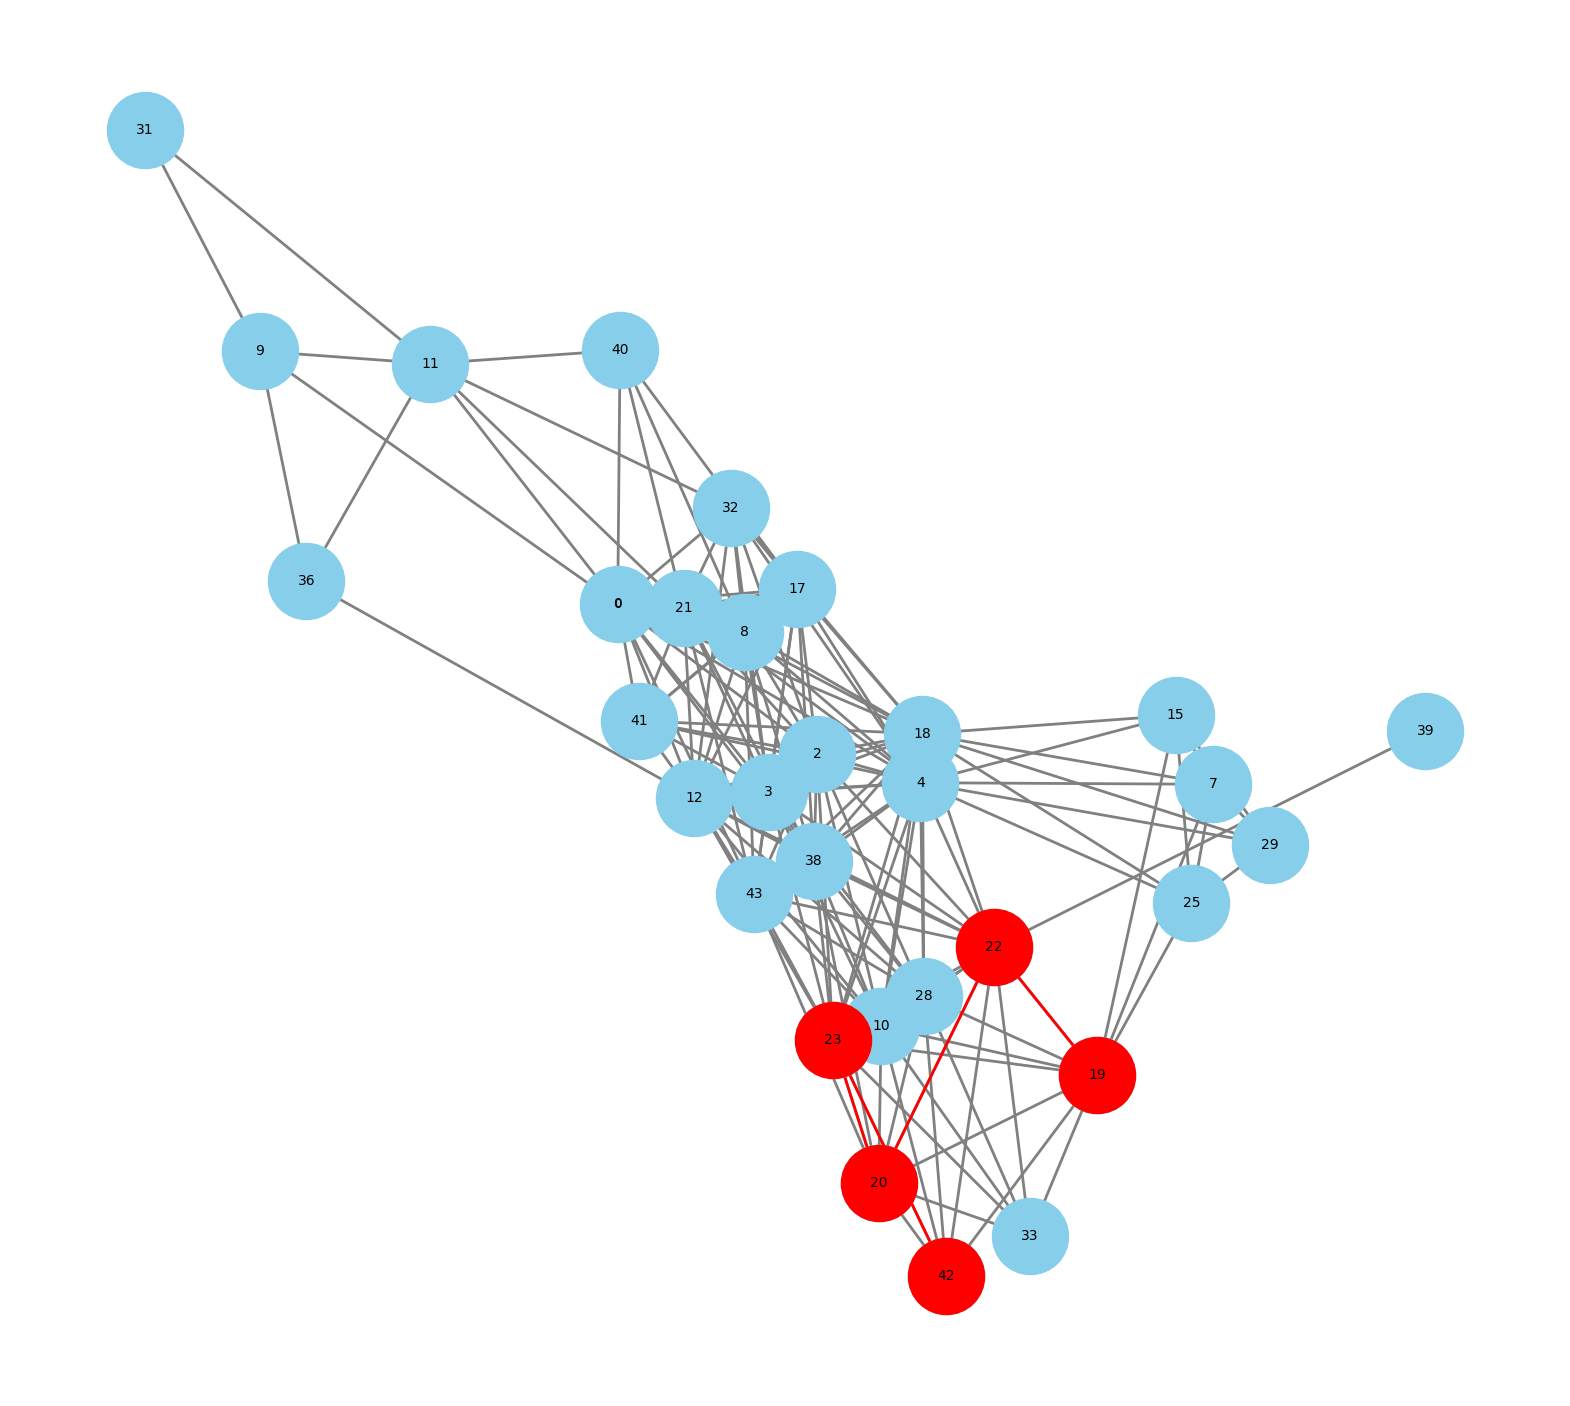

In [ ]:
import random
import heapq

# Function to calculate heuristic value based on positivity score
def calculate_positivity_heuristic(node_index):
    if node_index < len(normalized_scores):
        return normalized_scores[node_index]
    else:
        return 0  # Default to 0 if node_index is out of range

# Implement modified A* algorithm to find the 5 most reachable nodes
def find_most_reachable_nodes(graph, start_node, num_nodes=5):
    open_list = [(calculate_positivity_heuristic(start_node), start_node)]
    closed_list = set()
    g_score = {start_node: 0}
    f_score = {start_node: calculate_positivity_heuristic(start_node)}
    reachable_nodes = []

    while open_list:
        current_node = heapq.heappop(open_list)[1]  # Pop the node with the lowest f-score
        closed_list.add(current_node)
        reachable_nodes.append(current_node)

        if len(reachable_nodes) >= num_nodes:
            break

        if current_node in graph:  # Check if the current node is in the graph
            for neighbor, edge_data in graph[current_node].items():
                if neighbor not in closed_list:
                    tentative_g_score = g_score[current_node] + edge_data['weight']
                    if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                        g_score[neighbor] = tentative_g_score
                        f_score[neighbor] = tentative_g_score + calculate_positivity_heuristic(neighbor)
                        heapq.heappush(open_list, (f_score[neighbor], neighbor))

    return reachable_nodes, [node for node in reachable_nodes if node in graph]

# Get the list of valid node indices in the graph
valid_nodes = list(graph.nodes())

# Select a random start node from the valid node indices
if valid_nodes:
    random_start_node = random.choice(valid_nodes)
    print("Randomly selected start node:", random_start_node)

    # Find the 5 most reachable nodes from the random start node
    most_reachable_nodes, astar_path = find_most_reachable_nodes(graph, random_start_node, num_nodes=5)

    # Print the result
    print("5 most reachable nodes from node", random_start_node, ":", most_reachable_nodes)

    # Print the metadata of the nodes in the A* path
    for node in astar_path:
        print("Node", node, "metadata:", dataset_Cell_Phones_and_Accessories[node])

    # Draw the graph with expanded size and highlight the A* path
    fig, ax = plt.subplots(figsize=(20, 18))
    pos = nx.spring_layout(graph, seed=42)
    nx.draw(graph, pos, with_labels=True, node_size=3000, font_size=10, node_color='skyblue', edge_color='gray', width=2)

    # Draw the A* path on the graph
    nx.draw_networkx_nodes(graph, pos, nodelist=astar_path, node_color='red', node_size=3000)
    nx.draw_networkx_edges(graph, pos, edgelist=[(astar_path[i], astar_path[i+1]) for i in range(len(astar_path)-1)], edge_color='red', width=2)

    # Rename nodes with numbers
    node_labels = {i: str(i) for i in range(len(dataset_Cell_Phones_and_Accessories))}
    nx.draw_networkx_labels(graph, pos, labels=node_labels, font_color='black', font_size=8)

    # Show the graph
    plt.show()
else:
    print("No valid nodes found in the graph.")


Randomly selected start node: 7
Reachable nodes from node 7 : [7, 15, 29, 25, 19, 4, 18, 41, 23, 32, 38, 20, 3, 22, 43, 33, 17, 21, 10, 28, 42, 0, 8, 12, 2, 36, 9, 11, 39, 40, 31]
A* Path: {4: 7, 15: 7, 18: 7, 19: 7, 25: 7, 29: 7, 10: 19, 20: 19, 22: 19, 23: 19, 28: 19, 33: 19, 42: 19, 0: 4, 2: 4, 3: 4, 8: 4, 12: 4, 17: 4, 21: 4, 32: 4, 38: 4, 41: 4, 43: 4, 11: 32, 39: 22, 40: 17, 9: 0, 36: 12, 31: 9}


KeyError: 1

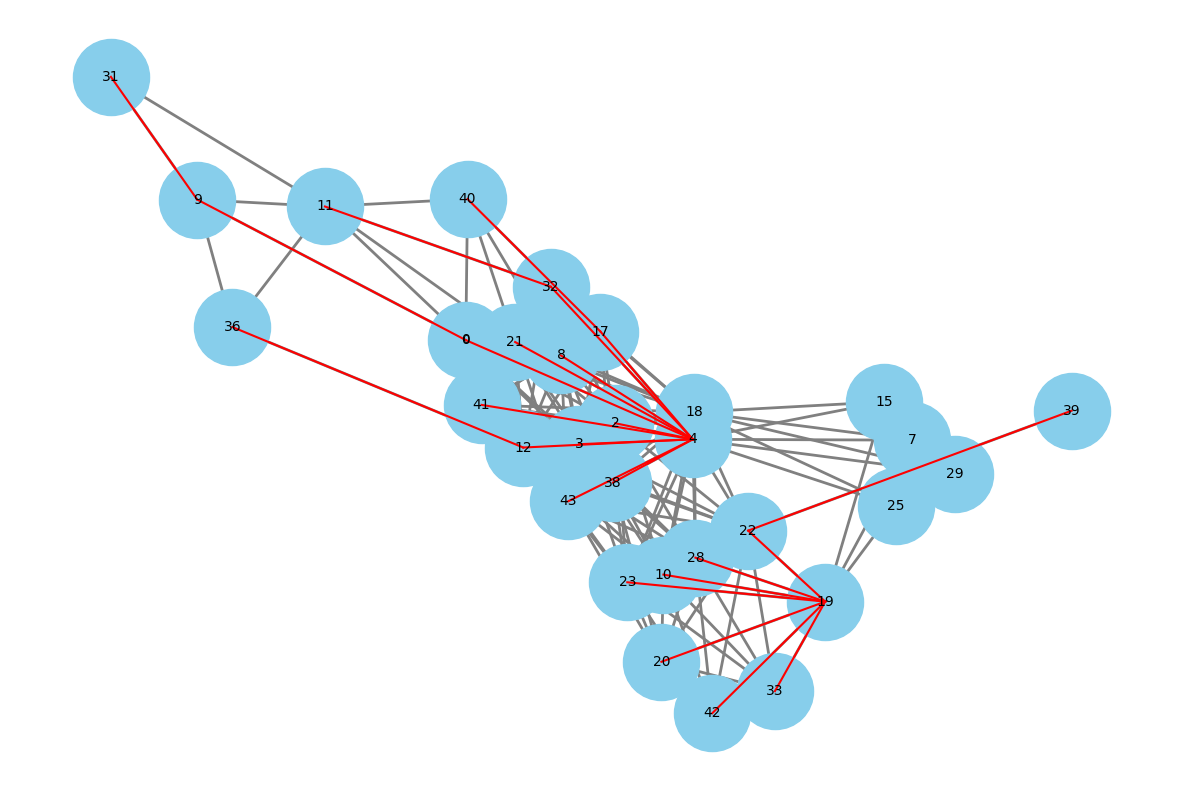

In [ ]:
import random
import heapq
import matplotlib.pyplot as plt

# Function to calculate heuristic value based on positivity score
def calculate_positivity_heuristic(node_index):
    if node_index < len(normalized_scores):
        return normalized_scores[node_index]
    else:
        return 0  # Default to 0 if node_index is out of range

# Implement modified A* algorithm to find reachable nodes and the A* path
def find_most_reachable_nodes(graph, start_node):
    open_list = [(calculate_positivity_heuristic(start_node), start_node)]
    closed_list = set()
    g_score = {start_node: 0}
    f_score = {start_node: calculate_positivity_heuristic(start_node)}
    reachable_nodes = []

    came_from = {}  # Store the parent of each node in the A* path

    while open_list:
        current_node = heapq.heappop(open_list)[1]  # Pop the node with the lowest f-score
        closed_list.add(current_node)
        reachable_nodes.append(current_node)

        if current_node in graph:  # Check if the current node is in the graph
            for neighbor, edge_data in graph[current_node].items():
                if neighbor not in closed_list:
                    tentative_g_score = g_score[current_node] + edge_data['weight']
                    if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                        came_from[neighbor] = current_node
                        g_score[neighbor] = tentative_g_score
                        f_score[neighbor] = tentative_g_score + calculate_positivity_heuristic(neighbor)
                        heapq.heappush(open_list, (f_score[neighbor], neighbor))

    return reachable_nodes, came_from

# Get the list of valid node indices in the graph
valid_nodes = list(graph.nodes())

# Select a random start node from the valid node indices
if valid_nodes:
    random_start_node = random.choice(valid_nodes)
    print("Randomly selected start node:", random_start_node)

    # Find reachable nodes and the A* path from the random start node
    reachable_nodes, astar_path = find_most_reachable_nodes(graph, random_start_node)

    # Print the result
    print("Reachable nodes from node", random_start_node, ":", reachable_nodes)
    print("A* Path:", astar_path)

    # Draw the graph with A* path highlighted
    fig, ax = plt.subplots(figsize=(15, 10))
    pos = nx.spring_layout(graph, seed=42)
    nx.draw(graph, pos, with_labels=True, node_size=3000, font_size=10, node_color='skyblue', edge_color='gray', width=2)

    # Draw A* path
    if astar_path:
        for node, parent_node in astar_path.items():
            if parent_node in astar_path:
                plt.plot([pos[parent_node][0], pos[node][0]], [pos[parent_node][1], pos[node][1]], color='red')

    # Rename nodes with numbers
    node_labels = {i: str(i) for i in range(len(dataset_Cell_Phones_and_Accessories))}
    nx.draw_networkx_labels(graph, pos, labels=node_labels, font_color='black', font_size=8)

    # Show the graph
    plt.show()

else:
    print("No valid nodes found in the graph.")


In [ ]:
import nltk
nltk.download('wordnet')

import csv
import networkx as nx
from nltk.corpus import wordnet as wn

# Step function for numeric attributes
def numeric_similarity(attr1, attr2, threshold=0.5):
    if abs(attr1 - attr2) < threshold:
        return 1
    else:
        return 0

# Wu-Palmer similarity for textual attributes
def wu_palmer_similarity(word1, word2):
    synsets1 = wn.synsets(word1)
    synsets2 = wn.synsets(word2)
    if synsets1 and synsets2:
        similarity = max((wn.wup_similarity(s1, s2) or 0) for s1 in synsets1 for s2 in synsets2)
    else:
        similarity = 0
    return similarity

# Combine similarity measures into a single number
def combine_similarity(numeric_sim, textual_sim):
    return (numeric_sim + textual_sim) / 2

# Create an empty graph
graph = nx.Graph()

# Read the CSV file and convert tuples to nodes in the graph
with open('amazon.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        # Create a node for each tuple, excluding specific columns
        node_id = row['product_id']
        node_attributes = {key: value for key, value in row.items() if key not in ['rating', 'rating_count', 'img_link', 'product_link']}
        graph.add_node(node_id, **node_attributes)

# Calculate edge weights based on attribute similarities
for node1 in graph.nodes():
    for node2 in graph.nodes():
        if node1 != node2 and not graph.has_edge(node1, node2):
            numeric_sim = 0
            textual_sim = 0
            for attr_name, attr_value in graph.nodes[node1].items():
                if isinstance(attr_value, (int, float)) and isinstance(graph.nodes[node2].get(attr_name), (int, float)):
                    numeric_sim += numeric_similarity(attr_value, graph.nodes[node2][attr_name])
                elif isinstance(attr_value, str) and isinstance(graph.nodes[node2].get(attr_name), str):
                    textual_sim += wu_palmer_similarity(attr_value, graph.nodes[node2][attr_name])
            combined_sim = combine_similarity(numeric_sim, textual_sim)
            normalized_sim = min(max(combined_sim, 0), 1)
            if normalized_sim < 0.5:
                graph.add_edge(node1, node2, weight=normalized_sim)

# Visualize the graph if needed
nx.draw(graph, with_labels=True)
plt.show()


[nltk_data] Downloading package wordnet to /root/nltk_data...


KeyboardInterrupt: 

In [ ]:
import csv

# Read the CSV file and get the data types of attributes
with open('amazon.csv', 'r') as file:
    reader = csv.DictReader(file)
    # Read the first row to get attribute names
    first_row = next(reader)
    # Print attribute names and their data types
    for attr_name, attr_value in first_row.items():
        print(f"Attribute: {attr_name}, Data Type: {type(attr_value).__name__}")


Attribute: product_id, Data Type: str
Attribute: product_name, Data Type: str
Attribute: category, Data Type: str
Attribute: discounted_price, Data Type: str
Attribute: actual_price, Data Type: str
Attribute: discount_percentage, Data Type: str
Attribute: rating, Data Type: str
Attribute: rating_count, Data Type: str
Attribute: about_product, Data Type: str
Attribute: user_id, Data Type: str
Attribute: user_name, Data Type: str
Attribute: review_id, Data Type: str
Attribute: review_title, Data Type: str
Attribute: review_content, Data Type: str
Attribute: img_link, Data Type: str
Attribute: product_link, Data Type: str


In [ ]:
import csv
from nltk.corpus import wordnet as wn

# Wu-Palmer similarity for textual attributes
def wu_palmer_similarity(word1, word2):
    synsets1 = wn.synsets(word1)
    synsets2 = wn.synsets(word2)
    if synsets1 and synsets2:
        similarity = max((wn.wup_similarity(s1, s2) or 0) for s1 in synsets1 for s2 in synsets2)
    else:
        similarity = 0
    return similarity

# Read the CSV file and compare each row with every other row
with open('amazon.csv', 'r') as file:
    reader = csv.DictReader(file)

    # Limit to 50 rows
    rows = [next(reader) for _ in range(50)]

    for i in range(len(rows)):
        for j in range(i+1, len(rows)):
            textual_sim = 0
            for attr_name in ['product_name', 'category', 'about_product', 'review_title']:
                attr_value_i = rows[i][attr_name]
                attr_value_j = rows[j][attr_name]

                # Textual attributes
                if isinstance(attr_value_i, str) and isinstance(attr_value_j, str):
                    textual_sim += wu_palmer_similarity(attr_value_i, attr_value_j)

            combined_sim = textual_sim / 4  # Combined similarity (average of 4 attributes)
            print(f"Similarity between Row {i} and Row {j}: {combined_sim}")


Similarity between Row 0 and Row 1: 0.0
Similarity between Row 0 and Row 2: 0.0
Similarity between Row 0 and Row 3: 0.0
Similarity between Row 0 and Row 4: 0.0
Similarity between Row 0 and Row 5: 0.0
Similarity between Row 0 and Row 6: 0.0
Similarity between Row 0 and Row 7: 0.0
Similarity between Row 0 and Row 8: 0.0
Similarity between Row 0 and Row 9: 0.0
Similarity between Row 0 and Row 10: 0.0
Similarity between Row 0 and Row 11: 0.0
Similarity between Row 0 and Row 12: 0.0
Similarity between Row 0 and Row 13: 0.0
Similarity between Row 0 and Row 14: 0.0
Similarity between Row 0 and Row 15: 0.0
Similarity between Row 0 and Row 16: 0.0
Similarity between Row 0 and Row 17: 0.0
Similarity between Row 0 and Row 18: 0.0
Similarity between Row 0 and Row 19: 0.0
Similarity between Row 0 and Row 20: 0.0
Similarity between Row 0 and Row 21: 0.0
Similarity between Row 0 and Row 22: 0.0
Similarity between Row 0 and Row 23: 0.0
Similarity between Row 0 and Row 24: 0.0
Similarity between Row 0 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Function to calculate cosine similarity between two sentences
def cosine_similarity_score(sentence1, sentence2):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform([sentence1, sentence2])
    cosine_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])
    return cosine_sim[0][0]

# Read the CSV file and compare each row with every other row
with open('amazon.csv', 'r') as file:
    reader = csv.DictReader(file)

    # Limit to 50 rows
    rows = [next(reader) for _ in range(50)]

    for i in range(len(rows)):
        for j in range(i+1, len(rows)):
            sentence1 = rows[i]['product_name'] + ' ' + rows[i]['category'] + ' ' + rows[i]['about_product'] + ' ' + rows[i]['review_title']
            sentence2 = rows[j]['product_name'] + ' ' + rows[j]['category'] + ' ' + rows[j]['about_product'] + ' ' + rows[j]['review_title']

            similarity_score = cosine_similarity_score(sentence1, sentence2)
            print(f"Similarity between Row {i} and Row {j}: {similarity_score}")


Similarity between Row 0 and Row 1: 0.2951537715153288
Similarity between Row 0 and Row 2: 0.47837686877374525
Similarity between Row 0 and Row 3: 0.2974807622793418
Similarity between Row 0 and Row 4: 0.4633781421942386
Similarity between Row 0 and Row 5: 0.31408884883827026
Similarity between Row 0 and Row 6: 0.31940197582713603
Similarity between Row 0 and Row 7: 0.2545611583393246
Similarity between Row 0 and Row 8: 0.16395448494435055
Similarity between Row 0 and Row 9: 0.3204235797465242
Similarity between Row 0 and Row 10: 0.37386005104260256
Similarity between Row 0 and Row 11: 0.2879123847866958
Similarity between Row 0 and Row 12: 0.24968479898674856
Similarity between Row 0 and Row 13: 0.3479638995487896
Similarity between Row 0 and Row 14: 0.46433079811077926
Similarity between Row 0 and Row 15: 0.27745465867963964
Similarity between Row 0 and Row 16: 0.1496778912796759
Similarity between Row 0 and Row 17: 0.2944021006312106
Similarity between Row 0 and Row 18: 0.2621933249

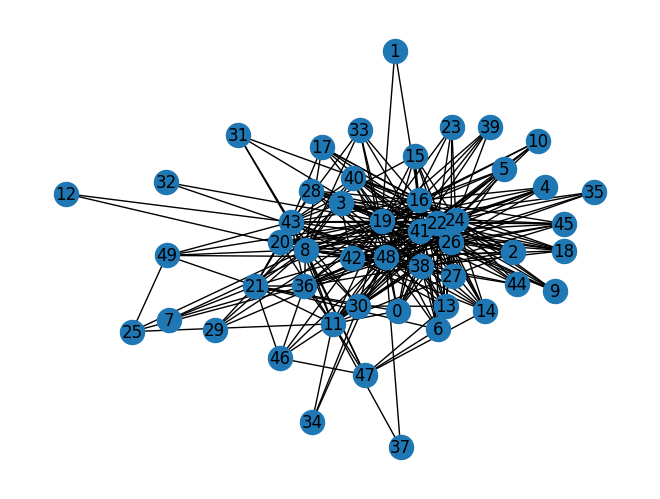

In [ ]:
!pip install sentence_transformers
import csv
import networkx as nx
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Load pre-trained SBERT model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Function to calculate cosine similarity between two sentences
def cosine_similarity_score(sentence1, sentence2):
    # Generate embeddings for the sentences
    embeddings = model.encode([sentence1, sentence2])
    # Calculate cosine similarity between the embeddings
    cosine_sim = cosine_similarity([embeddings[0]], [embeddings[1]])[0][0]
    return cosine_sim

# Create an empty graph
graph = nx.Graph()

# Read the CSV file and create nodes for each row
with open('amazon.csv', 'r') as file:
    reader = csv.DictReader(file)

    # Limit to 50 rows
    rows = [next(reader) for _ in range(50)]

    # Add nodes to the graph
    for i, row in enumerate(rows):
        graph.add_node(i)

    # Compare each row with every other row and add edges based on similarity
    for i in range(len(rows)):
        for j in range(i+1, len(rows)):
            sentence1 = rows[i]['product_name'] + ' ' + rows[i]['category'] + ' ' + rows[i]['about_product'] + ' ' + rows[i]['review_title']
            sentence2 = rows[j]['product_name'] + ' ' + rows[j]['category'] + ' ' + rows[j]['about_product'] + ' ' + rows[j]['review_title']

            similarity_score = cosine_similarity_score(sentence1, sentence2)
            # Add an edge if similarity is greater than or equal to 0.4
            if similarity_score <= 0.4:
                graph.add_edge(i, j, weight=similarity_score)

# Visualize the graph if needed
nx.draw(graph, with_labels=True)
plt.show()


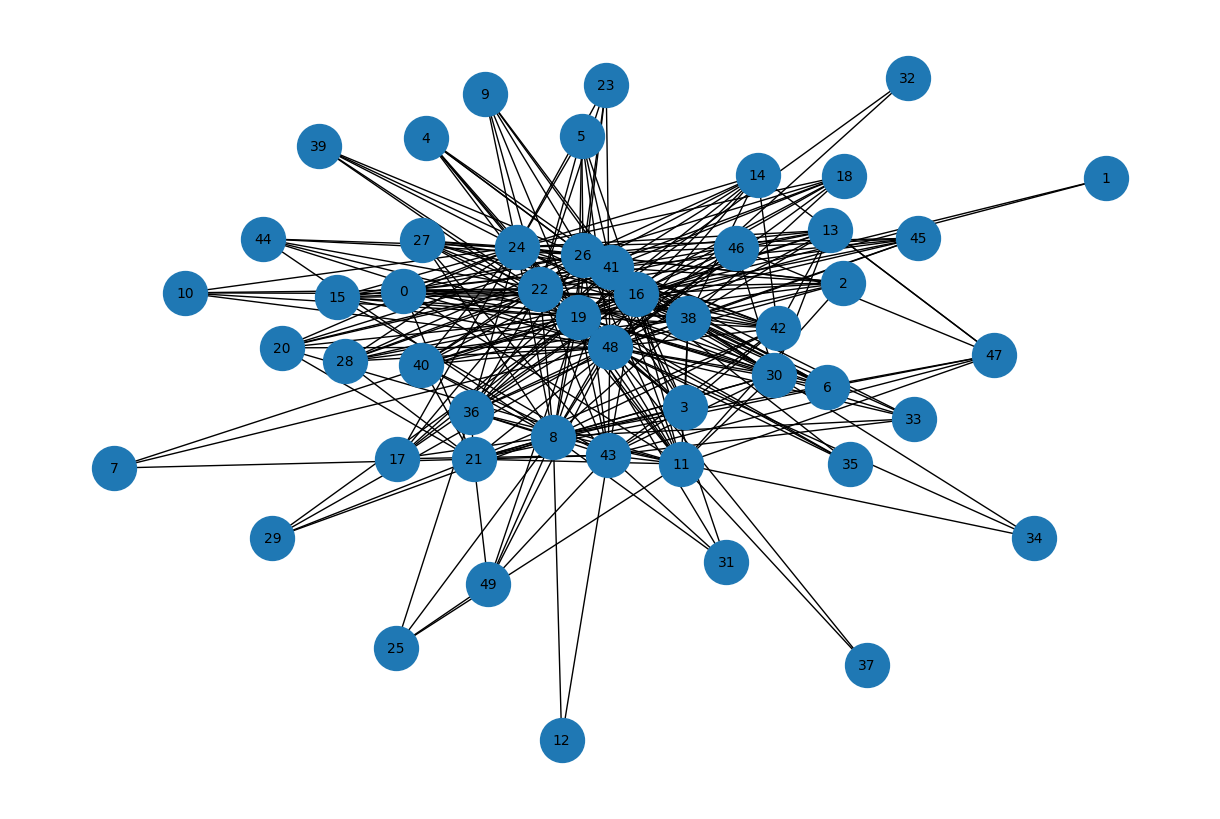

In [ ]:
# Visualize the graph with increased size
plt.figure(figsize=(12, 8))  # Increase the size of the figure
nx.draw(graph, with_labels=True, node_size=1000, font_size=10)  # Increase node size and font size
plt.show()

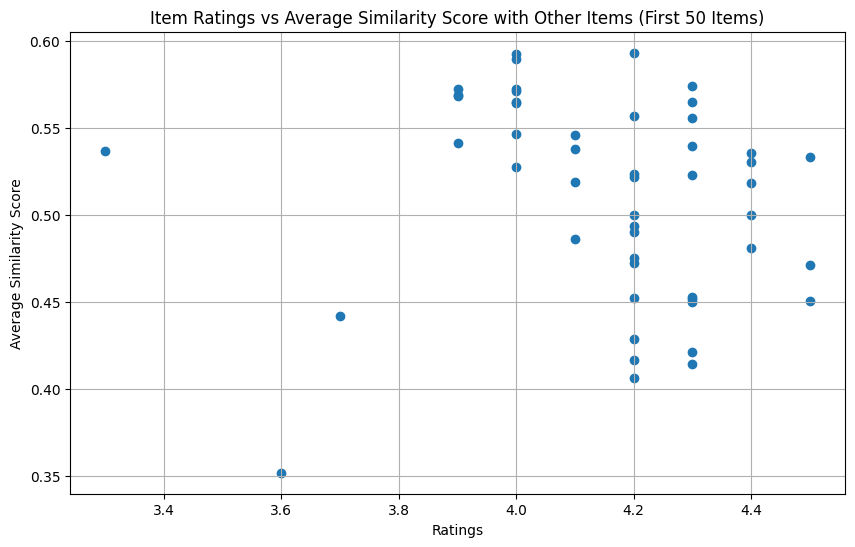

In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Load pre-trained SBERT model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Function to calculate cosine similarity between two sentences
def cosine_similarity_score(sentence1, sentence2):
    # Generate embeddings for the sentences
    embeddings = model.encode([sentence1, sentence2])
    # Calculate cosine similarity between the embeddings
    cosine_sim = cosine_similarity([embeddings[0]], [embeddings[1]])[0][0]
    return cosine_sim

# Read the CSV file
with open('amazon.csv', 'r') as file:
    reader = csv.DictReader(file)
    rows = list(reader)[:50]  # Limit to the first 50 rows

    ratings = []
    similarities = []

    for i, row in enumerate(rows):
        # Extract the attributes for comparison
        attributes = [row['product_name'], row['category'], row['about_product'], row['review_title']]

        # Calculate similarity scores with all other items
        similarity_scores = []
        for j, other_row in enumerate(rows):
            if i != j:  # Exclude self-comparison
                other_attributes = [other_row['product_name'], other_row['category'], other_row['about_product'], other_row['review_title']]
                similarity_score = cosine_similarity_score(' '.join(attributes), ' '.join(other_attributes))
                similarity_scores.append(similarity_score)

        # Calculate the mean similarity score
        avg_similarity = np.mean(similarity_scores)
        similarities.append(avg_similarity)

        # Extract the rating of the item
        rating = float(row['rating'])
        ratings.append(rating)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.scatter(ratings, similarities)
plt.xlabel('Ratings')
plt.ylabel('Average Similarity Score')
plt.title('Item Ratings vs Average Similarity Score with Other Items (First 50 Items)')
plt.grid(True)
plt.show()


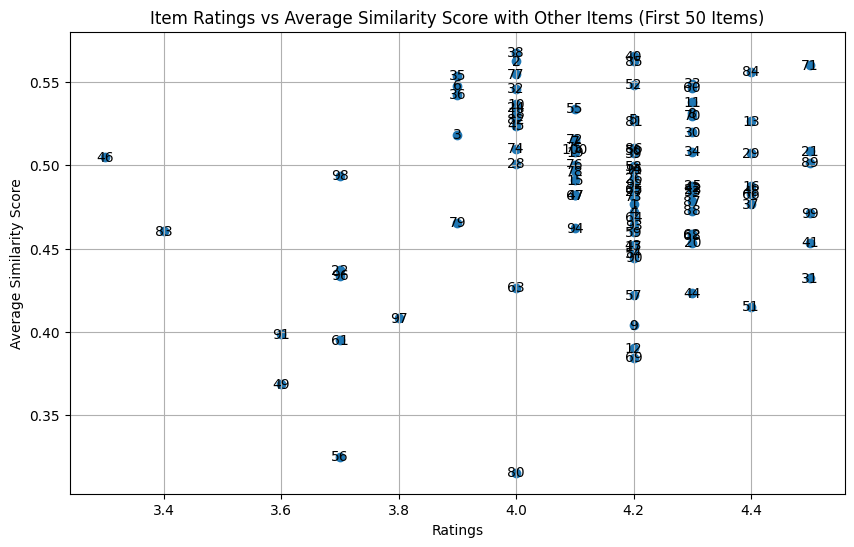

In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Load pre-trained SBERT model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Function to calculate cosine similarity between two sentences
def cosine_similarity_score(sentence1, sentence2):
    # Generate embeddings for the sentences
    embeddings = model.encode([sentence1, sentence2])
    # Calculate cosine similarity between the embeddings
    cosine_sim = cosine_similarity([embeddings[0]], [embeddings[1]])[0][0]
    return cosine_sim

# Read the CSV file
with open('amazon.csv', 'r') as file:
    reader = csv.DictReader(file)
    rows = list(reader)[:100]  # Limit to the first 50 rows

    ratings = []
    similarities = []
    item_numbers = []  # Store item numbers

    for i, row in enumerate(rows):
        # Extract the attributes for comparison
        attributes = [row['product_name'], row['category'], row['about_product'], row['review_title']]

        # Calculate similarity scores with all other items
        similarity_scores = []
        for j, other_row in enumerate(rows):
            if i != j:  # Exclude self-comparison
                other_attributes = [other_row['product_name'], other_row['category'], other_row['about_product'], other_row['review_title']]
                similarity_score = cosine_similarity_score(' '.join(attributes), ' '.join(other_attributes))
                similarity_scores.append(similarity_score)

        # Calculate the mean similarity score
        avg_similarity = np.mean(similarity_scores)
        similarities.append(avg_similarity)

        # Extract the rating of the item
        rating = float(row['rating'])
        ratings.append(rating)

        # Store item number
        item_numbers.append(i + 1)  # Item numbers start from 1

# Plot the graph
plt.figure(figsize=(10, 6))
plt.scatter(ratings, similarities)
plt.xlabel('Ratings')
plt.ylabel('Average Similarity Score')
plt.title('Item Ratings vs Average Similarity Score with Other Items (First 50 Items)')
plt.grid(True)

# Add item numbers as labels for each point
for i, txt in enumerate(item_numbers):
    plt.text(ratings[i], similarities[i], txt, ha='center', va='center')

plt.show()


In [ ]:
!pip install sentence_transformers
import csv
from collections import defaultdict
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Load pre-trained SBERT model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Function to calculate cosine similarity between two sentences
def cosine_similarity_score(sentence1, sentence2):
    # Generate embeddings for the sentences
    embeddings = model.encode([sentence1, sentence2])
    # Calculate cosine similarity between the embeddings
    cosine_sim = cosine_similarity([embeddings[0]], [embeddings[1]])[0][0]
    return cosine_sim

# Read the CSV file
with open('amazon.csv', 'r') as file:
    reader = csv.DictReader(file)
    rows = list(reader)[:50]  # Limit to the first 50 rows

    # Create a dictionary to store item numbers for each unique combination of rating and similarity value
    item_numbers_dict = defaultdict(list)

    for i, row in enumerate(rows):
        # Extract the attributes for comparison
        attributes = [row['product_name'], row['category'], row['about_product'], row['review_title']]

        for j, other_row in enumerate(rows):
            if i != j:  # Exclude self-comparison
                other_attributes = [other_row['product_name'], other_row['category'], other_row['about_product'], other_row['review_title']]
                similarity_score = cosine_similarity_score(' '.join(attributes), ' '.join(other_attributes))

                # Extract the rating of the item
                rating = row['rating']
                # Round similarity score to 2 decimal places for better grouping
                similarity_score = round(similarity_score, 2)

                # Append item number to the corresponding key in the dictionary
                key = (rating, similarity_score)
                item_numbers_dict[key].append(i + 1)  # Item numbers start from 1

    # Sort the dictionary keys based on rating and similarity values
    sorted_keys = sorted(item_numbers_dict.keys(), key=lambda x: (x[0], x[1]))

    # Create the 2D string matrix
    max_rating_length = max(len(key[0]) for key in sorted_keys)
    max_similarity_length = max(len(str(key[1])) for key in sorted_keys)
    matrix = np.empty((len(sorted_keys), len(rows)), dtype=object)

    for i, key in enumerate(sorted_keys):
        rating, similarity = key
        item_numbers = sorted(item_numbers_dict[key])  # Sort item numbers for consistent output
        matrix[i, :] = ''  # Initialize row with empty strings

        for item_number in item_numbers:
            matrix[i, item_number - 1] = str(item_number)

    # Print the 2D string matrix
    print(' ' * (max_rating_length + 1) + ' '.join(f'{i + 1:<2}' for i in range(len(rows))))
    for i, key in enumerate(sorted_keys):
        rating, similarity = key
        print(f'{rating:>{max_rating_length}} {similarity:>{max_similarity_length}} | ' + ' '.join(f'{value:>2}' if value else '  ' for value in matrix[i]))



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 2.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

    1  2  3  4  5  6  7  8  9  10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
3.3 0.20000000298023224 |                                                                                                                                        46            
3.3 0.2800000011920929 |                                                                                                                                        46            
3.3 0.30000001192092896 |                                                                                                                                        46            
3.3 0.33000001311302185 |                                                                                                                                        46            
3.3 0.38999998569488525 |                                                                                                                      

In [ ]:
from tabulate import tabulate
from prettytable import PrettyTable
    # Print the 2D string matrix in tabular format
headers = [''] + [f'{i + 1}' for i in range(len(rows))]
table_data = [[f'{rating} {similarity}'] + list(row) for (rating, similarity), row in zip(sorted_keys, matrix)]
table = PrettyTable(headers)
for row in table_data:
  table.add_row(row)

print(table)

+-------------------------+---+---+---+---+---+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|                         | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15 | 16 | 17 | 18 | 19 | 20 | 21 | 22 | 23 | 24 | 25 | 26 | 27 | 28 | 29 | 30 | 31 | 32 | 33 | 34 | 35 | 36 | 37 | 38 | 39 | 40 | 41 | 42 | 43 | 44 | 45 | 46 | 47 | 48 | 49 | 50 |
+-------------------------+---+---+---+---+---+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
| 3.3 0.20000000298023224 |   |   |   |   |   |   |   |   |   |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |

In [ ]:
import csv
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Load pre-trained SBERT model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Function to calculate cosine similarity between two sentences
def cosine_similarity_score(sentence1, sentence2):
    # Generate embeddings for the sentences
    embeddings = model.encode([sentence1, sentence2])
    # Calculate cosine similarity between the embeddings
    cosine_sim = cosine_similarity([embeddings[0]], [embeddings[1]])[0][0]
    return cosine_sim

# Read the CSV file
with open('amazon.csv', 'r') as file:
    reader = csv.DictReader(file)
    rows = list(reader)[:50]  # Limit to the first 50 rows

    # Initialize a nested dictionary to store similarity scores for each rating
    rating_similarity_dict = {}

    for row in rows:
        # Extract the attributes for comparison
        attributes = [row['product_name'], row['category'], row['about_product'], row['review_title']]

        # Calculate similarity scores with all other items
        similarity_scores = []
        for other_row in rows:
            other_attributes = [other_row['product_name'], other_row['category'], other_row['about_product'], other_row['review_title']]
            similarity_score = cosine_similarity_score(' '.join(attributes), ' '.join(other_attributes))
            similarity_scores.append(similarity_score)

        # Calculate the mean similarity score
        avg_similarity = np.mean(similarity_scores)

        # Extract the rating of the item
        rating = float(row['rating'])

        # Store the similarity score for the corresponding rating
        if rating not in rating_similarity_dict:
            rating_similarity_dict[rating] = []
        rating_similarity_dict[rating].append(avg_similarity)

# Create a matrix from the nested dictionary
matrix = []
for rating, similarities in rating_similarity_dict.items():
    row = [rating] + similarities
    matrix.append(row)

# Sort the matrix rows based on ratings
matrix.sort(key=lambda x: x[0])

# Print the matrix
print('Rating', ' '.join(f'Similarity {i + 1}' for i in range(len(matrix[0]) - 1)))
for row in matrix:
    print(' '.join(str(item) for item in row))


Rating Similarity 1
3.3 0.5459718
3.6 0.36478996
3.7 0.45306623
3.9 0.5507324 0.58072793 0.5773287 0.5767753
4.0 0.60054606 0.58007383 0.5735872 0.57306975 0.5371568 0.5810888 0.59765595 0.5553529
4.1 0.5552722 0.5283401 0.54713285 0.49626362
4.2 0.5099319 0.50040686 0.56558883 0.41827977 0.4283378 0.5312927 0.44006312 0.5040178 0.46301922 0.4859264 0.60136694 0.48309886 0.53306884
4.3 0.5643317 0.57339305 0.4261851 0.46115315 0.46257758 0.5489617 0.5827181 0.5326597 0.46369094 0.43272313
4.4 0.5396146 0.52800745 0.5448826 0.50997514 0.49110186
4.5 0.5426291 0.46139157 0.48201966


In [ ]:
import csv
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from tabulate import tabulate

# Load pre-trained SBERT model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Function to calculate cosine similarity between two sentences
def cosine_similarity_score(sentence1, sentence2):
    # Generate embeddings for the sentences
    embeddings = model.encode([sentence1, sentence2])
    # Calculate cosine similarity between the embeddings
    cosine_sim = cosine_similarity([embeddings[0]], [embeddings[1]])[0][0]
    return cosine_sim

# Read the CSV file
with open('amazon.csv', 'r') as file:
    reader = csv.DictReader(file)
    rows = list(reader)[:50]  # Limit to the first 50 rows

    # Initialize a nested dictionary to store similarity scores for each rating
    rating_similarity_dict = {}

    for row in rows:
        # Extract the attributes for comparison
        attributes = [row['product_name'], row['category'], row['about_product'], row['review_title']]

        # Calculate similarity scores with all other items
        similarity_scores = []
        for other_row in rows:
            other_attributes = [other_row['product_name'], other_row['category'], other_row['about_product'], other_row['review_title']]
            similarity_score = cosine_similarity_score(' '.join(attributes), ' '.join(other_attributes))
            similarity_scores.append(similarity_score)

        # Calculate the mean similarity score
        avg_similarity = np.mean(similarity_scores)

        # Extract the rating of the item
        rating = float(row['rating'])

        # Store the similarity score for the corresponding rating
        if rating not in rating_similarity_dict:
            rating_similarity_dict[rating] = []
        rating_similarity_dict[rating].append(avg_similarity)

    # Create a matrix from the nested dictionary
    matrix = []
    for rating, similarities in rating_similarity_dict.items():
        row = [rating] + similarities
        matrix.append(row)

    # Sort the matrix rows based on ratings
    matrix.sort(key=lambda x: x[0])

    # Add item numbers inside the matrix
    for i, row in enumerate(matrix):
        item_numbers = list(range(1, 51))
        matrix[i] = [item_numbers[i]] + row

    # Print the matrix in tabular format
    headers = ['Item'] + [f'Similarity {i + 1}' for i in range(len(matrix[0]) - 1)]
    print(tabulate(matrix, headers=headers, tablefmt='grid'))


+--------+----------------+----------------+
|   Item |   Similarity 1 |   Similarity 2 |
+========+================+================+
|      1 |            3.3 |       0.545972 |
+--------+----------------+----------------+
|      2 |            3.6 |       0.36479  |
+--------+----------------+----------------+
|      3 |            3.7 |       0.453066 |
+--------+----------------+----------------+
|      4 |            3.9 |       0.550732 |
+--------+----------------+----------------+
|      5 |            4   |       0.600546 |
+--------+----------------+----------------+
|      6 |            4.1 |       0.555272 |
+--------+----------------+----------------+
|      7 |            4.2 |       0.509932 |
+--------+----------------+----------------+
|      8 |            4.3 |       0.564332 |
+--------+----------------+----------------+
|      9 |            4.4 |       0.539615 |
+--------+----------------+----------------+
|     10 |            4.5 |       0.542629 |
+--------+